# Sarcasm and Irony detection
### Deep Neural Networks

Dataset reference: https://www.kaggle.com/datasets/nikhiljohnk/tweets-with-sarcasm-and-irony

Name: Lucrezia Labardi

#### Import of libraries and dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd drive/MyDrive/UNI MAGISTRALE/Machine Learning/Labardi ML Exam

[Errno 2] No such file or directory: 'drive/MyDrive/UNI MAGISTRALE/Machine Learning/exam'
/content/drive/MyDrive/UNI MAGISTRALE/Machine Learning/exam


In [ ]:
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import torch
from torch import nn
import pandas as pd
import random

# import import_ipynb
import utils



# to get reproducible results:
torch.manual_seed(1234)
np.random.seed(1234)

In [ ]:
# import the preprocessed dataset
X = pd.read_csv("data/X_clean.csv")
y = pd.read_csv("data/y_clean.csv")
X_test = pd.read_csv("data/Xtest_clean.csv")
y_test = pd.read_csv("data/ytest_clean.csv")

In [ ]:
X

,url,tags,num_hashtags,emojis,num_special,num_excl_quest,text_all_clean,n_char,n_words,avg_len_words
0,1,0,4,0,0,0,be aware dirty step to get money staylight sta...,64.0,11.0,5.818182
1,1,0,4,0,0,0,sarcasm for people who dont understand diy art...,45.0,8.0,5.625000
2,0,2,6,0,0,0,dailymail readers being sensible as always sho...,89.0,11.0,8.090909
3,0,1,1,0,0,1,why do i get the feeling you like games sarcasm,38.0,10.0,3.800000
4,0,2,1,0,0,0,you probably just missed the text sarcastic,37.0,7.0,5.285714
...,...,...,...,...,...,...,...,...,...,...
81349,1,0,4,0,0,0,photo image via we heart it childhood cool fun...,47.0,10.0,4.700000
81350,1,0,2,0,0,0,i never knewi better put this out to the unive...,88.0,20.0,4.400000
81351,0,0,2,0,0,0,hey just wanted to say thanks puberty for lett...,102.0,23.0,4.434783
81352,1,0,1,0,0,0,im sure coverage like the fox news special the...,88.0,18.0,4.888889


In [ ]:
X_test

,url,tags,num_hashtags,emojis,num_special,num_excl_quest,text_all_clean,n_char,n_words,avg_len_words
0,1,0,1,0,0,0,no one ever predicted this was going to happen...,45.0,10.0,4.500000
1,0,1,1,0,0,0,its as closely related as andrews original cla...,71.0,13.0,5.461538
2,0,0,1,0,0,0,i find it ironic when vegans say they love foo...,43.0,11.0,3.909091
3,0,0,1,0,0,0,quick rt that throwing money vine ive not seen...,72.0,18.0,4.000000
4,0,0,4,0,0,0,yep keep adding me to your devops lists justsa...,54.0,11.0,4.909091
...,...,...,...,...,...,...,...,...,...,...
8114,0,0,1,0,0,0,why yes i will totally submit my photos to a s...,110.0,26.0,4.230769
8115,1,0,1,0,0,2,test on a saturday thank you uni sarcasm griff...,63.0,12.0,5.250000
8116,0,1,1,0,0,0,listening to s misery isnt at all disconcertin...,47.0,9.0,5.222222
8117,0,1,2,0,0,0,there you go being kind again sarcasm standup4...,43.0,8.0,5.375000


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
y

,class
0,figurative
1,figurative
2,figurative
3,figurative
4,figurative
...,...
81349,sarcasm
81350,sarcasm
81351,sarcasm
81352,sarcasm


In [ ]:
y_test

,class
0,figurative
1,figurative
2,figurative
3,figurative
4,figurative
...,...
8114,sarcasm
8115,sarcasm
8116,sarcasm
8117,sarcasm


In [ ]:
# encode the labels
y = le.fit_transform(y["class"])
y_test = le.fit_transform(y_test["class"])

In [ ]:
y

array([0, 0, 0, ..., 3, 3, 3])

In [ ]:
# separate the numeric features from the text
X_text = X["text_all_clean"]
X = X.drop("text_all_clean", axis=1)
X_test_text = X_test["text_all_clean"]
X_test = X_test.drop("text_all_clean", axis=1)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MaxAbsScaler
from scipy.sparse import hstack

#reproduce the same preprocessing as the pipeline used for classical models
vectorizer = CountVectorizer(max_features=5000)
scaler = MaxAbsScaler()

x_train_text = vectorizer.fit_transform(X_text)
x_test_text = vectorizer.transform(X_test_text)

x_train_feat = scaler.fit_transform(X)
x_test_feat = scaler.transform(X_test)

x_train = hstack([x_train_text, x_train_feat]).todense()
x_test = hstack([x_test_text, x_test_feat]).todense()

y_train = np.asarray(y)
y_test = np.asarray(y_test)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_dev, y_train, y_dev = train_test_split(x_train, y_train, test_size=0.1, random_state=42, stratify=y_train)

print(x_train.shape)
print(x_dev.shape)
print(x_test.shape)
print(y_train.shape)
print(y_dev.shape)
print(y_test.shape)


(73218, 5009)
(8136, 5009)
(8119, 5009)
(73218,)
(8136,)
(8119,)


In [ ]:
def np2iter_class(x, y, shuffle=True):
  x = torch.tensor(x, dtype=torch.float)
  y = torch.tensor(y, dtype=torch.long).squeeze()
  print(y.shape)
  #print(y)

  ds = torch.utils.data.TensorDataset(x, y)
  return torch.utils.data.DataLoader(ds, batch_size=64, shuffle=shuffle)

c_train_iter = np2iter_class(x_train, y_train, shuffle=True)
c_dev_iter =  np2iter_class(x_dev, y_dev, shuffle=False)
c_test_iter =  np2iter_class(x_test, y_test, shuffle=False)

torch.Size([73218])
torch.Size([8136])
torch.Size([8119])


### Linear model

In [ ]:
class MultiClassModel(nn.Module):
  def __init__(self, in_features, out_features):
    super(MultiClassModel, self).__init__()
    self.layer = nn.Linear(in_features=in_features, out_features=out_features)

  def forward(self, x):
    return self.layer(x)

In [ ]:
from sklearn.metrics import accuracy_score

def val_acc(y_pred, y_test):
  y_pred = np.argmax(y_pred, axis=1)
  return accuracy_score(y_pred=y_pred, y_true=y_test)

In [ ]:
classification_model = MultiClassModel(in_features=x_train.shape[1], out_features=4)
classification_model = classification_model.cuda()

In [ ]:
history = utils.train(model=classification_model,
                            loss=nn.CrossEntropyLoss(),
                            val_metrics={"cls": nn.CrossEntropyLoss(), "acc": val_acc},
                            optimizer=torch.optim.SGD(classification_model.parameters(), lr=0.01),
                            train_ds=c_train_iter,
                            dev_ds=c_dev_iter,
                            num_epochs=100,
                            early_stopper=utils.EarlyStopper(metric_name="cls", patience=5, minimize=True))

epoch 1 train loss: 1.0703 val_cls: 0.8891 val_acc: 0.7000
tensor(0.8891) None
epoch 2 train loss: 0.8128 val_cls: 0.7581 val_acc: 0.7123
tensor(0.7581) tensor(0.8891)
epoch 3 train loss: 0.7235 val_cls: 0.6969 val_acc: 0.7211
tensor(0.6969) tensor(0.7581)
epoch 4 train loss: 0.6759 val_cls: 0.6602 val_acc: 0.7270
tensor(0.6602) tensor(0.6969)
epoch 5 train loss: 0.6455 val_cls: 0.6355 val_acc: 0.7284
tensor(0.6355) tensor(0.6602)
epoch 6 train loss: 0.6242 val_cls: 0.6177 val_acc: 0.7305
tensor(0.6177) tensor(0.6355)
epoch 7 train loss: 0.6082 val_cls: 0.6042 val_acc: 0.7321
tensor(0.6042) tensor(0.6177)
epoch 8 train loss: 0.5958 val_cls: 0.5935 val_acc: 0.7329
tensor(0.5935) tensor(0.6042)
epoch 9 train loss: 0.5859 val_cls: 0.5850 val_acc: 0.7334
tensor(0.5850) tensor(0.5935)
epoch 10 train loss: 0.5778 val_cls: 0.5781 val_acc: 0.7338
tensor(0.5781) tensor(0.5850)
epoch 11 train loss: 0.5710 val_cls: 0.5721 val_acc: 0.7338
tensor(0.5721) tensor(0.5781)
epoch 12 train loss: 0.5652 v

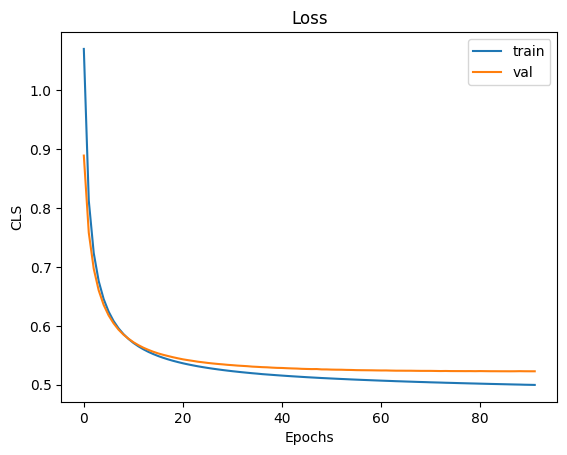

In [ ]:
plt.plot(history["train_loss"], label='train')
plt.plot(history["val_cls"], label='val')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('CLS');
plt.legend()

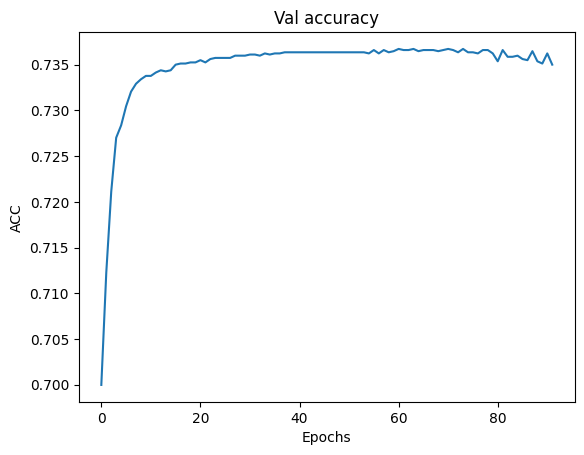

In [ ]:
plt.plot(history["val_acc"])
plt.title('Val accuracy')
plt.xlabel('Epochs')
plt.ylabel('ACC');

In [ ]:
pred = utils.test(classification_model, c_test_iter)
print(pred.shape)

torch.Size([8119, 4])


In [ ]:
pred = np.argmax(pred, axis=1)
pred_true = le.inverse_transform(pred)
y_true = le.inverse_transform(y_test)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
print(classification_report(y_pred= pred_true, y_true=y_true))

              precision    recall  f1-score   support

  figurative       0.31      0.00      0.00      2044
       irony       0.67      0.99      0.80      2111
     regular       0.99      1.00      0.99      1859
     sarcasm       0.68      0.99      0.80      2105

    accuracy                           0.75      8119
   macro avg       0.66      0.75      0.65      8119
weighted avg       0.65      0.75      0.65      8119



### First deep NN

In [ ]:
class DeepMultiClassModel(nn.Module):
  def __init__(self, in_features, out_features):
    super(DeepMultiClassModel, self).__init__()
    self.layer = nn.Sequential(nn.Linear(in_features = in_features, out_features=50),
                              nn.ReLU(),
                              nn.Linear(in_features=50, out_features=out_features))

  def forward(self, x):
    return self.layer(x)

In [ ]:
classification_model = DeepMultiClassModel(in_features=x_train.shape[1], out_features=4)
classification_model = classification_model.cuda()

In [ ]:
history = utils.train(model=classification_model,
                            loss=nn.CrossEntropyLoss(),
                            val_metrics={"cls": nn.CrossEntropyLoss(), "acc": val_acc},
                            optimizer=torch.optim.SGD(classification_model.parameters(), lr=0.01),
                            train_ds=c_train_iter,
                            dev_ds=c_dev_iter,
                            num_epochs=100,
                            early_stopper=utils.EarlyStopper(metric_name="cls", patience=5, minimize=True))

epoch 1 train loss: 1.1774 val_cls: 0.8777 val_acc: 0.7048
tensor(0.8777) None
epoch 2 train loss: 0.7103 val_cls: 0.6125 val_acc: 0.7284
tensor(0.6125) tensor(0.8777)
epoch 3 train loss: 0.5769 val_cls: 0.5526 val_acc: 0.7291
tensor(0.5526) tensor(0.6125)
epoch 4 train loss: 0.5400 val_cls: 0.5326 val_acc: 0.7348
tensor(0.5326) tensor(0.5526)
epoch 5 train loss: 0.5251 val_cls: 0.5230 val_acc: 0.7361
tensor(0.5230) tensor(0.5326)
epoch 6 train loss: 0.5173 val_cls: 0.5186 val_acc: 0.7367
tensor(0.5186) tensor(0.5230)
epoch 7 train loss: 0.5127 val_cls: 0.5155 val_acc: 0.7364
tensor(0.5155) tensor(0.5186)
epoch 8 train loss: 0.5097 val_cls: 0.5145 val_acc: 0.7366
tensor(0.5145) tensor(0.5155)
epoch 9 train loss: 0.5075 val_cls: 0.5129 val_acc: 0.7367
tensor(0.5129) tensor(0.5145)
epoch 10 train loss: 0.5057 val_cls: 0.5129 val_acc: 0.7367
tensor(0.5129) tensor(0.5129)
epoch 11 train loss: 0.5043 val_cls: 0.5116 val_acc: 0.7366
tensor(0.5116) tensor(0.5129)
epoch 12 train loss: 0.5031 v

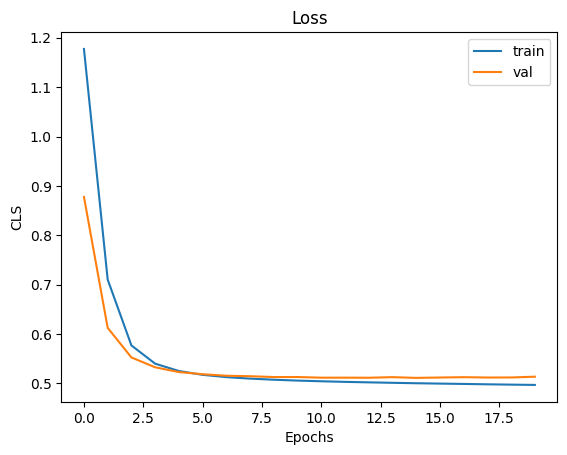

In [ ]:
plt.plot(history["train_loss"], label='train')
plt.plot(history["val_cls"], label='val')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('CLS');
plt.legend()

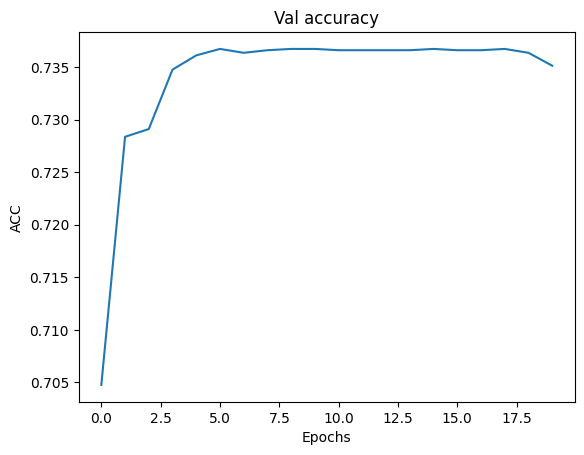

In [ ]:
plt.plot(history["val_acc"])
plt.title('Val accuracy')
plt.xlabel('Epochs')
plt.ylabel('ACC');

In [ ]:
pred = utils.test(classification_model, c_test_iter)
print(pred.shape)

torch.Size([8119, 4])


In [ ]:
conv_pred = np.argmax(pred, axis=1)
pred_true = le.inverse_transform(conv_pred)
print(classification_report(y_pred=pred_true, y_true=y_true))

              precision    recall  f1-score   support

  figurative       0.50      0.00      0.00      2044
       irony       0.67      1.00      0.80      2111
     regular       0.99      1.00      0.99      1859
     sarcasm       0.68      1.00      0.80      2105

    accuracy                           0.75      8119
   macro avg       0.71      0.75      0.65      8119
weighted avg       0.70      0.75      0.65      8119



### Second deep NN

In [ ]:
class DeepMultiClassModel(nn.Module):
  def __init__(self, in_features, out_features):
    super(DeepMultiClassModel, self).__init__()
    self.layer = nn.Sequential(nn.Linear(in_features = in_features, out_features=50),
                              nn.ReLU(),
                              nn.Linear(in_features = 50, out_features=50),
                              nn.ReLU(),
                              nn.Linear(in_features=50, out_features=out_features))

  def forward(self, x):
    return self.layer(x)

In [ ]:
classification_model = DeepMultiClassModel(in_features=x_train.shape[1], out_features=4)
classification_model = classification_model.cuda()

In [ ]:
history = utils.train(model=classification_model,
                            loss=nn.CrossEntropyLoss(),
                            val_metrics={"cls": nn.CrossEntropyLoss(), "acc": val_acc},
                            optimizer=torch.optim.SGD(classification_model.parameters(), lr=0.01),
                            train_ds=c_train_iter,
                            dev_ds=c_dev_iter,
                            num_epochs=100,
                            early_stopper=utils.EarlyStopper(metric_name="cls", patience=5, minimize=True))

epoch 1 train loss: 1.3471 val_cls: 1.2232 val_acc: 0.6826
tensor(1.2232) None
epoch 2 train loss: 0.8514 val_cls: 0.5978 val_acc: 0.7282
tensor(0.5978) tensor(1.2232)
epoch 3 train loss: 0.5484 val_cls: 0.5280 val_acc: 0.7333
tensor(0.5280) tensor(0.5978)
epoch 4 train loss: 0.5165 val_cls: 0.5134 val_acc: 0.7357
tensor(0.5134) tensor(0.5280)
epoch 5 train loss: 0.5090 val_cls: 0.5097 val_acc: 0.7365
tensor(0.5097) tensor(0.5134)
epoch 6 train loss: 0.5055 val_cls: 0.5084 val_acc: 0.7366
tensor(0.5084) tensor(0.5097)
epoch 7 train loss: 0.5034 val_cls: 0.5098 val_acc: 0.7362
tensor(0.5098) tensor(0.5084)
epoch 8 train loss: 0.5021 val_cls: 0.5118 val_acc: 0.7324
tensor(0.5118) tensor(0.5084)
epoch 9 train loss: 0.5008 val_cls: 0.5089 val_acc: 0.7367
tensor(0.5089) tensor(0.5084)
epoch 10 train loss: 0.4998 val_cls: 0.5123 val_acc: 0.7344
tensor(0.5123) tensor(0.5084)
epoch 11 train loss: 0.4989 val_cls: 0.5101 val_acc: 0.7367
tensor(0.5101) tensor(0.5084)
EARLY STOPPING 


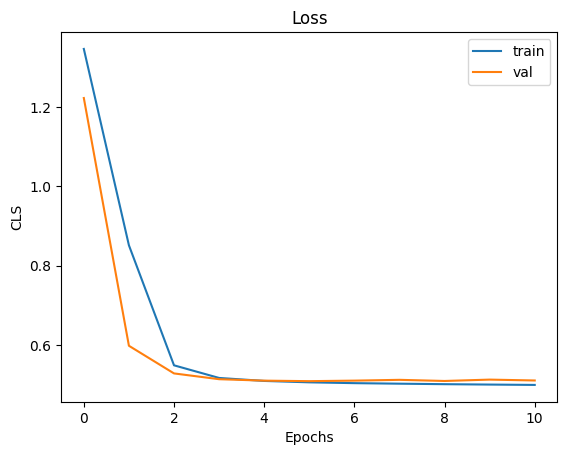

In [ ]:
plt.plot(history["train_loss"], label='train')
plt.plot(history["val_cls"], label='val')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('CLS');
plt.legend()

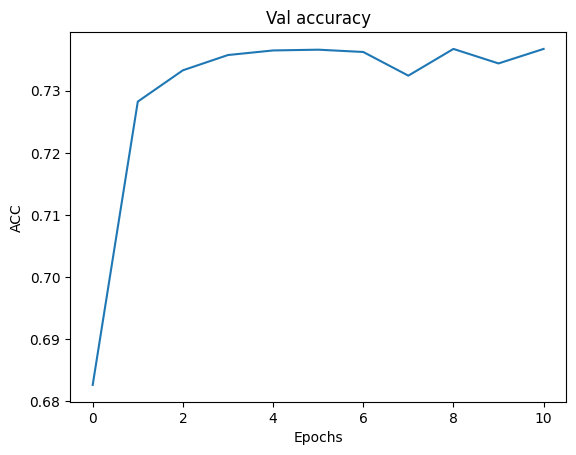

In [ ]:
plt.plot(history["val_acc"])
plt.title('Val accuracy')
plt.xlabel('Epochs')
plt.ylabel('ACC');

In [ ]:
pred = utils.test(classification_model, c_test_iter)
print(pred.shape)

torch.Size([8119, 4])


In [ ]:
conv_pred = np.argmax(pred, axis=1)
pred_true = le.inverse_transform(conv_pred)
print(classification_report(y_pred=pred_true, y_true=y_true))

              precision    recall  f1-score   support

  figurative       0.33      0.00      0.00      2044
       irony       0.67      1.00      0.80      2111
     regular       0.99      1.00      0.99      1859
     sarcasm       0.67      1.00      0.80      2105

    accuracy                           0.75      8119
   macro avg       0.67      0.75      0.65      8119
weighted avg       0.66      0.75      0.64      8119

